In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Logistic regression\bank-full.csv",sep=';')
bank2=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Logistic regression\bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank2.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder= LabelEncoder()
bank2.job=label_encoder.fit_transform(bank2.job)

In [8]:
bank2.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
label_encoder= LabelEncoder()
bank2.marital=label_encoder.fit_transform(bank2.marital)

In [10]:
label_encoder= LabelEncoder()
bank2.education=label_encoder.fit_transform(bank2.education)

In [11]:
label_encoder= LabelEncoder()
bank2.default=label_encoder.fit_transform(bank2.default)

In [12]:
label_encoder= LabelEncoder()
bank2.housing=label_encoder.fit_transform(bank2.housing)

In [13]:
label_encoder= LabelEncoder()
bank2.loan=label_encoder.fit_transform(bank2.loan)

In [14]:
label_encoder= LabelEncoder()
bank2.contact=label_encoder.fit_transform(bank2.contact)

In [15]:
label_encoder= LabelEncoder()
bank2.month=label_encoder.fit_transform(bank2.month)

In [16]:
label_encoder= LabelEncoder()
bank2.poutcome=label_encoder.fit_transform(bank2.poutcome)
bank2.y=label_encoder.fit_transform(bank2.y)
bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Prepareing Logistic Regression model

In [17]:
X=bank2.iloc[:,0:16]
Y=bank2.iloc[:,16]

In [18]:
model=LogisticRegression()
model.fit(X,Y)

C:\Users\VIRAJ KAMAT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict for X dataset

In [19]:
bank_pred=model.predict(X)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(Y,bank_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Model accuracy is 89%
and all the scores are high.hence model is perfect

ROC Curve

Text(0, 0.5, 'True Positive Rate')

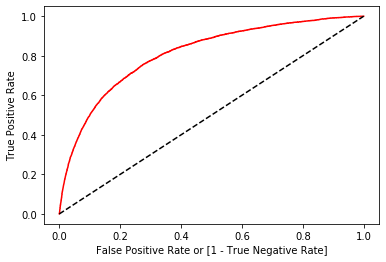

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y, bank_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [23]:
auc

0.5724913226281891

In [24]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Average Age Group Loan Balance

In [25]:
bank['age2']  = np.where((bank['age'] <20) ,'0-20',
                                np.where((bank['age'] >=20) & (bank['age'] <=30),'20-30',
                               np.where((bank['age']>30) & (bank['age'] <=50),'30-50',
np.where((bank['age']>50) & (bank['age'] <=65),'50-65',np.where((bank['age']>50) & (bank['age'] <=65),'50-65','65+')))))

In [26]:
data = bank.groupby('age2')['balance'].mean()
data  = pd.DataFrame({'Age':data.index, 'Average_balance':data.values})
data

,Age,Average_balance
0,0-20,497.042553
1,20-30,1023.472290
2,30-50,1286.708014
3,50-65,1773.374177
4,65+,2822.002663


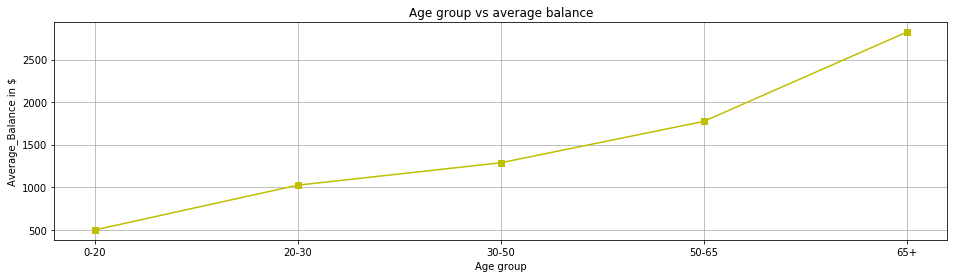

In [27]:
plt.figure(figsize = (16,4))
plt.plot('Age','Average_balance','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Balance in $');
plt.title('Age group vs average balance');

Distribution of jobs

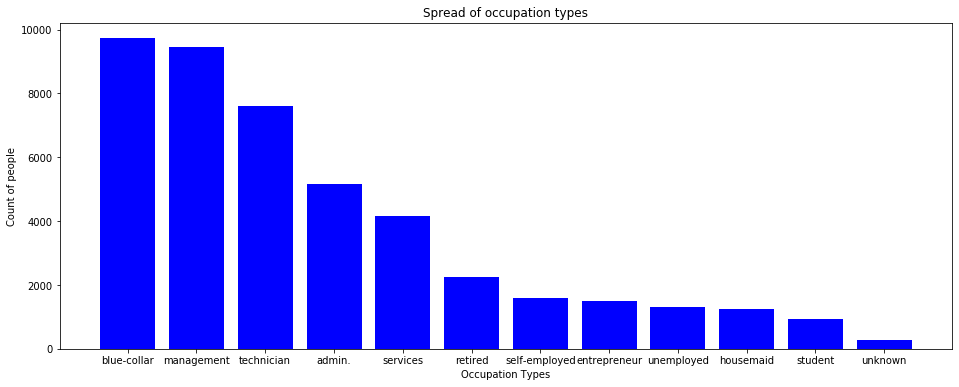

In [28]:
data_job = bank['job'].value_counts();
plt.figure(figsize = (16,6));
plt.bar(data_job.index,data_job.values,color ='b');
plt.xticks(data_job.index);
plt.xlabel('Occupation Types');
plt.ylabel('Count of people');
plt.title('Spread of occupation types');

Exploring Loan balances by Job Categories

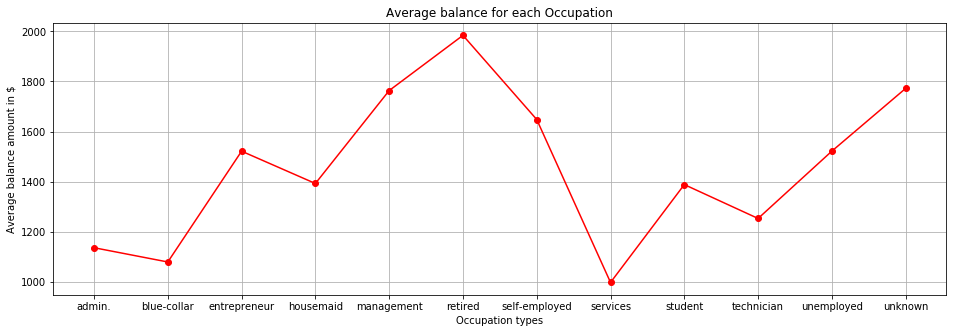

In [29]:
data = bank.groupby('job')['balance'].mean();
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'ro-');
plt.xlabel('Occupation types');
plt.ylabel('Average balance amount in $');
plt.title('Average balance for each Occupation');
plt.xticks(data.index);